## Quien gana mas rondas en promedio entre las dos mitades en las 333 partidos.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
db = 'https://raw.githubusercontent.com/razbackup/CSV-EV2/main/dbcs.csv'
data = pd.read_csv(db, engine='python', sep=';', encoding='utf-8')

In [9]:
T_arr_half1 = []
CT_arr_half1 = []
T_arr_half2 = []
CT_arr_half2 = []

In [10]:
def findMatchs(data):
    match_id= data['MatchId'] # columnas MatchId
    unique_matchs_maps = match_id.drop_duplicates() # Filtra los IDS
    arr = unique_matchs_maps.to_numpy() # Convierte a array
    lista = arr.tolist() # Convierte a lista  
    return lista


def findHalfsByMatch(data, match_id):
    match = data[data['MatchId'] == match_id]
    half_one = match[match['RoundId'] <= 15]
    half_two = match[match['RoundId'] > 15]
    return [half_one, half_two] 

def count_round_winner(team_df, team_name):
    return team_df[team_df['Team'] == team_name]['RoundWinner'].astype(str).eq('True').sum()

def findWinnersByHalf(half):
    halfOne = {}
    halfTwo = {}
    
    for half_df, half_name in zip(half, ["HalfOne", "HalfTwo"]):
        for team_name in ["Terrorist", "CounterTerrorist"]:
            win_count = count_round_winner(half_df, team_name)
            if half_name == "HalfOne":
                halfOne[team_name] = win_count
            else:
                halfTwo[team_name] = win_count
    
    return [halfOne, halfTwo]

In [11]:
matchs = findMatchs(data)
for match in matchs:
    halfs = findHalfsByMatch(data, match)
    half_one, half_two = findWinnersByHalf(halfs)
    T_arr_half1.append(half_one['Terrorist'])
    CT_arr_half1.append(half_one['CounterTerrorist'])
    T_arr_half2.append(half_two['Terrorist'])
    CT_arr_half2.append(half_two['CounterTerrorist'])

# Agrupar los datos en intervalos de 10 partidas y calcular el promedio
def group_and_average(data):
    grouped_data = []
    for i in range(0, len(data), 10):
        group = data[i:i+10]
        avg = sum(group) / len(group)
        grouped_data.append(avg)
    return grouped_data

T_arr_half1_grouped = group_and_average(T_arr_half1)
CT_arr_half1_grouped = group_and_average(CT_arr_half1)
T_arr_half2_grouped = group_and_average(T_arr_half2)
CT_arr_half2_grouped = group_and_average(CT_arr_half2)

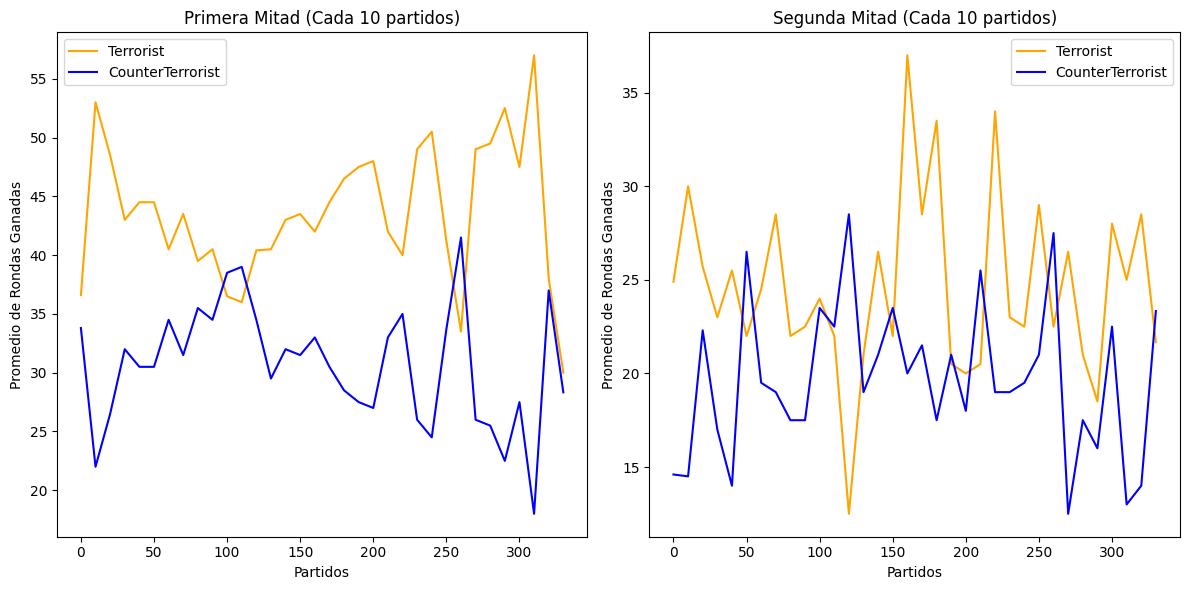

In [12]:
# Crear los gráficos
plt.figure(figsize=(12, 6))

# Primer gráfico para la primera mitad
plt.subplot(1, 2, 1)
plt.plot(range(0, len(T_arr_half1_grouped) * 10, 10), T_arr_half1_grouped, label='Terrorist', color='orange')
plt.plot(range(0, len(CT_arr_half1_grouped) * 10, 10), CT_arr_half1_grouped, label='CounterTerrorist', color='blue')
plt.xlabel('Partidos')
plt.ylabel('Promedio de Rondas Ganadas')
plt.title('Primera Mitad (Cada 10 partidos)')
plt.legend()

# Segundo gráfico para la segunda mitad
plt.subplot(1, 2, 2)
plt.plot(range(0, len(T_arr_half2_grouped) * 10, 10), T_arr_half2_grouped, label='Terrorist', color='orange')
plt.plot(range(0, len(CT_arr_half2_grouped) * 10, 10), CT_arr_half2_grouped, label='CounterTerrorist', color='blue')
plt.xlabel('Partidos')
plt.ylabel('Promedio de Rondas Ganadas')
plt.title('Segunda Mitad (Cada 10 partidos)')
plt.legend()

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()